# Einleitung

Der vorliegende Report dient zur Beschreibung des Projekts im Rahmen der Data Exploration
Vorlesung. Die Abgabe umfasst ein GitHub Repositpory mit dem erstellten Code und dem Report in Form eines Jupyter Notebooks. Ziel dieses Projekts ist es anhand des, im Folgenden beschriebenen
Datensatzes, eine exlorative Datenanalyse zu betreiben und ein Machine Learning Modell zu
entwickeln, das zuverlässige Ergebnisse liefert.

### Insalliere Requirements

In [54]:
! pip install -r requirements.txt

In [55]:
# importing all required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

%matplotlib inline

# Data Quality Check & Data Characterization



## Die verwendeten Daten

Bei den verwendeten Daten handelt es sich um einen Kaggle Datensatz (https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data; letzter Abruf: 04.04.2024). Der Datensatz enthält Informationen von 918 Patienten und umfasst zwölf verschiedene Merkmale, darunter de-
mografische Angaben wie Alter und Geschlecht, klinische Messungen wie Ruheblutdruck und
maximale Herzfrequenz, sowie Informationen zu Symptomen wie Brustschmerzen und zuvor dia-
gnostizierten Herzkrankheiten. Die Daten widerspiegeln auch medizinischen Tests wie Ruhe-
Elektrokardiogrammen und Belastungsuntersuchungen.

# 

In [56]:
# defining path in which the data is stored
data = "data/heart.csv"

In [57]:
# reading the data 
df = pd.read_csv(data)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Beschreibung der Attribute:
- Age: Alter des Patienten [Jahre]
- Sex: Geschlecht des Patienten [M: Männlich, F: Weiblich]
- ChestPainType: Brustschmerztyp [TA: Typische Angina, ATA: Atypische Angina, NAP: Nicht-Anginaler Schmerz, ASY: Asymptomatisch]
- RestingBP: Ruheblutdruck [mm Hg]
- Cholesterol: Serumcholesterin [mm/dl]
- FastingBS: Nüchternblutzucker [1: Wenn Nüchternblutzucker > 120 mg/dl, 0: Ansonsten] 
- RestingECG: Ruheelektrokardiogrammergebnisse [Normal: Normal, ST: Mit ST-T-Wellen-Abnormalitäten (T-Wellen-Inversionen und/oder ST-Hebungen oder -Senkungen von > 0,05 mV), LVH: Zeigt wahrscheinliche oder definitive linksventrikuläre Hypertrophie nach Estes-Kriterien]
- MaxHR: Maximale erreichte Herzfrequenz [Numerischer Wert zwischen 60 und 202]
- ExerciseAngina: Belastungsinduzierte Angina [J: Ja, N: Nein]
- Oldpeak: ST-Depression = ST [Numerischer Wert gemessen in Depression]
- ST_Slope: Die Steigung des Spitzen-Übungs-ST-Segments [Up: Aufsteigend, Flat: Flach, Down: Absteigend]
- HeartDisease: Ausgabeklasse [1: Herzkrankheit, 0: Normal]

In [58]:
# using the pandas method "describe()"" to get a describtion of the dataset
# ".T" transposes the dataframe (rows and columns are switched)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


Bereits nachdem man sich die Beschreibung des Datensatzes anschaut, kann man feststellen, dass die SPalten "Cholesterol" und "RestingBP" unerwartete minimal Werte aufweisen (ruhe Puls und Cholisterinspiegel können keine Werte von 0 annehmen).

In [59]:
# count null values
null_values_count = (df['RestingBP'] == 0).sum()
print("Anzahl der Nullwerte in der Spalte 'RestingBP':", null_values_count)

Anzahl der Nullwerte in der Spalte 'RestingBP': 1


In [60]:
# delete the only patient with the null value in RestingBP
df = df[df['RestingBP'] != 0]


Da es nur bei einem Patienten eine vermutliche Fehlmessung gab, wird dieser Patient aus dem Datensatz gelöscht.


In [61]:
# count null values
null_values_count = (df['Cholesterol'] == 0).sum()
print("Anzahl der Nullwerte in der Spalte 'Cholesterol':", null_values_count)

Anzahl der Nullwerte in der Spalte 'Cholesterol': 171


Leider weisen dennoch 171 Patienten bei Cholesterol den Wert 0 auf. Dies war bei der initialen explorativen Datenanalyse nicht auf den ersten Blick ersichtlich. Da das löschen von 171 Einträgen problematisch ist, wird in den fehldenen Stellen der durschnittliche Cholesterol Wert des Datensatzes eingesetzt. Somit sollen erheblichere Verfälschungen im Machine Learning Model im nachhinein vermieden werden. Ein Modell, das mit Daten von Patienten mit einem Cholesterol Wert von 0 trainiert ist, ist in der Realität nicht nützlich.

In [62]:
# we don't wont the 0 values, when calculating the mean value
df_cleaned = df[df['Cholesterol'] != 0]

# calculate mean value
average_chol = round(df_cleaned['Cholesterol'].mean())

print("Durchschnittlicher Cholesterinspiegel nach Entfernen von Nullwerten (ohne Nachkommastellen):", average_chol)


Durchschnittlicher Cholesterinspiegel nach Entfernen von Nullwerten (ohne Nachkommastellen): 245


In [63]:
# replace 0 values with the mean value
df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = average_chol

In [64]:
# check if the anomaly still exists
df["Cholesterol"].min()

85

In [65]:
# checking for missung values in the dataframe
missing_values = df.isnull().sum()
missing_values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [66]:
# checking for duplicated rows in the dataframe
duplicates = df.duplicated().sum()
duplicates

0

In [67]:
# determining unique values of categorial columns in the dataframe
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Eindeutige Werte für {col}:")
    print(unique_values)

Eindeutige Werte für Sex:
['M' 'F']
Eindeutige Werte für ChestPainType:
['ATA' 'NAP' 'ASY' 'TA']
Eindeutige Werte für RestingECG:
['Normal' 'ST' 'LVH']
Eindeutige Werte für ExerciseAngina:
['N' 'Y']
Eindeutige Werte für ST_Slope:
['Up' 'Flat' 'Down']


In [68]:
# get dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    object 
 2   ChestPainType   917 non-null    object 
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    int64  
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    object 
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    object 
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    object 
 11  HeartDisease    917 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.1+ KB


In [69]:
# getting the highest values of each column (categorial columns may be ignored here)
df.max()


Age                77
Sex                 M
ChestPainType      TA
RestingBP         200
Cholesterol       603
FastingBS           1
RestingECG         ST
MaxHR             202
ExerciseAngina      Y
Oldpeak           6.2
ST_Slope           Up
HeartDisease        1
dtype: object

In [70]:
# same goes for this but for minimal values
df.min()

Age                 28
Sex                  F
ChestPainType      ASY
RestingBP           80
Cholesterol         85
FastingBS            0
RestingECG         LVH
MaxHR               60
ExerciseAngina       N
Oldpeak           -2.6
ST_Slope          Down
HeartDisease         0
dtype: object

In [71]:
# check how many unique elements the dataset contains in each column  
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          66
Cholesterol       221
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

Die Analyse zur Datenqualität liefert auf den ersten Blick, bis auf die 2 Anomalien, kaum Mängel, da es keine fehlenden
Einträge oder duplizierte Zeilen gibt. Auch die Spalten mit den kategorischen Werten liefern saubere
und „aufgeräumte“ Werte. Der Datensatz ist im Allgemeinen sehr gut gepflegt.

# Exploratory Data Analysis

Im folgenden werden die Daten analysiert und statistische Verteilungen und Merkmale, sowie Anhängigkeiten zwischen verschiedenen Attributen werden grafisch aufgezeigt.

/var/folders/3l/_xvv3581559_krvl1r82px5w0000gn/T/ipykernel_3402/1820321649.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette=colors_red_green)


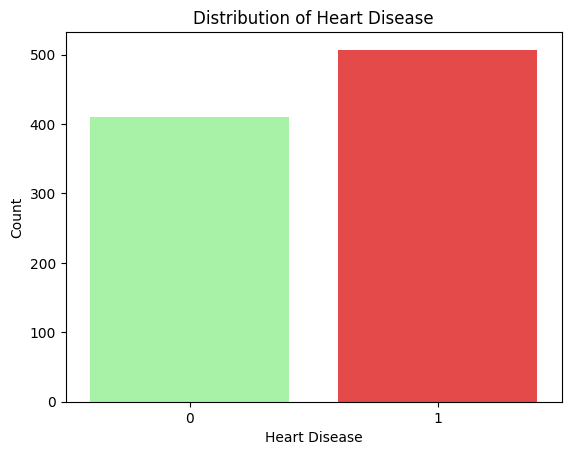

In [72]:
# visualize disease distribution in the dataset

colors_red_green = ["#9aff9a", "#ff3030"]

sns.countplot(x='HeartDisease', data=df, palette=colors_red_green)

plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease')

plt.show()

In [73]:
heart_disease_distribution = df['HeartDisease'].value_counts()
heart_disease_distribution

HeartDisease
1    507
0    410
Name: count, dtype: int64

Die erste Visualisierung zeigt die Verteilung zwischen gesunden und kranken Patienten. Es ist eine leichte Inbalance der Werte vorhanden. Nach Absprache mit dem Dozenten kann diese Aufgrund ihrer leichten Ausprägung in diesem Fall ignoriert werden.
Der Datensatz enthält 98 mehr betroffene als gesunde Patienten.

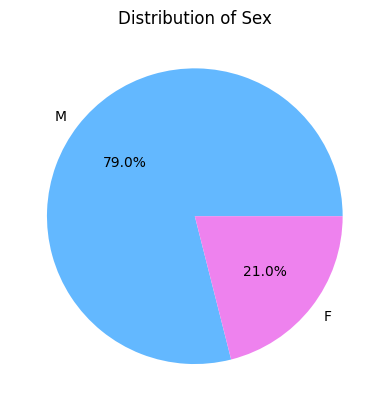

In [74]:
# pie chart for sex distribution
distribution = df["Sex"].value_counts()
colors = ['#63b8ff', '#ee82ee']

plt.title("Distribution of Sex")

plt.pie(distribution, labels=distribution.index, colors=colors, autopct='%1.1f%%')

plt.show()

Dieses Kuchendiagramm zeigt die Verteilung der Geschlächter in den Daten. 79% der Patienten sind männlich und 21% sind weiblich.

/var/folders/3l/_xvv3581559_krvl1r82px5w0000gn/T/ipykernel_3402/2936092103.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Age', data=df[df['Sex'] == 'F'], ax=ax2, palette=['#ee82ee'])
/var/folders/3l/_xvv3581559_krvl1r82px5w0000gn/T/ipykernel_3402/2936092103.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Age', data=df[df['Sex'] == 'M'], ax=ax3, palette=['#63b8ff'])


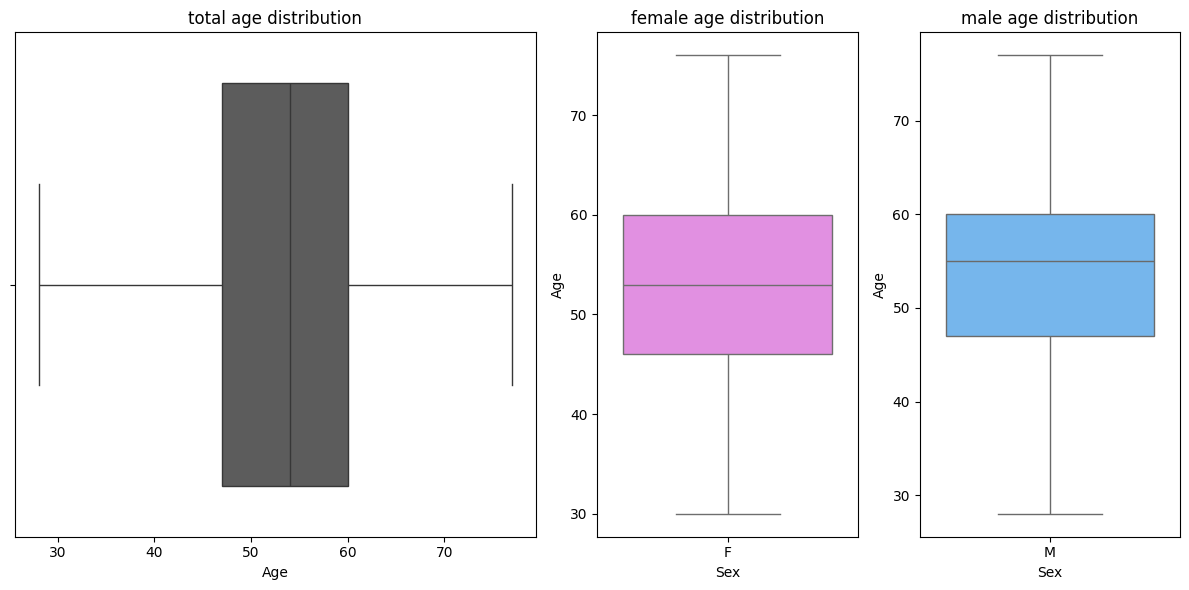

In [75]:
# create boxplots to display age distribution
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 3, width_ratios=[2, 1, 1])

# total age distribution
ax1 = fig.add_subplot(gs[0])
sns.boxplot(x=df["Age"], ax=ax1, color='#5c5c5c')
ax1.set_title('total age distribution')

# female age distribution
ax2 = fig.add_subplot(gs[1])
sns.boxplot(x='Sex', y='Age', data=df[df['Sex'] == 'F'], ax=ax2, palette=['#ee82ee'])
ax2.set_title('female age distribution')

# male age distribution
ax3 = fig.add_subplot(gs[2])
sns.boxplot(x='Sex', y='Age', data=df[df['Sex'] == 'M'], ax=ax3, palette=['#63b8ff']) 
ax3.set_title('male age distribution')

plt.tight_layout()
plt.show()

Diese Boxplots zeigen die gesamte Altersverteilung sowie die Verteilung pro Geschlecht. Die Altersspanne liegt im Durschschnitt zwischen 48 und 60 Jahren.

In [76]:
# print value_counts of age to identify outliers
counts = df["Age"].value_counts()
print("Counts for Age:")
print(counts)

Counts for Age:
Age
54    51
58    42
55    40
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: count, dtype: int64


Es gibt auch Patienten die "sehr" jung oder alt sind. Der jüngste Patient ist 28 und der älteste ist 77. Es kommen allerdings wenige Personen in diesem Datensatz vor, die an diese Altersgrenzen stoßen.

Im folgenden werden die verschiedenen kategorischen Attribute je nach Haufigkeit der Erkrankungen dargestellt.

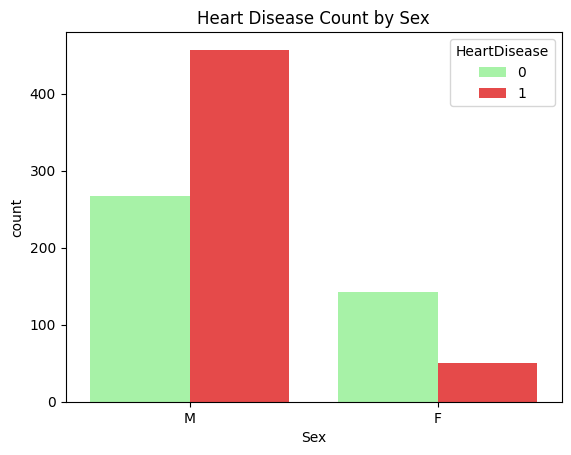

In [77]:
# create countplot to display HeartDisease distribution by sex
sns.countplot(x='Sex', hue='HeartDisease', data=df, palette=['#9aff9a', '#ff3030'])

plt.xlabel("Sex")
plt.title("Heart Disease Count by Sex")

plt.show()

In diesem Datensatz gibt es innerhalt der männlichen Patientengruppe deutlich mehr Herzerkrankte, während es bei der weiblichen Gruppe weniger Betroffene gibt. Man beachte, dass der Datensatz mehr männliche Einträge enthält als weibliche.

/var/folders/3l/_xvv3581559_krvl1r82px5w0000gn/T/ipykernel_3402/798950861.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['ChestPainType'], palette="rainbow")


Text(0.5, 1.0, 'ChestPainType')

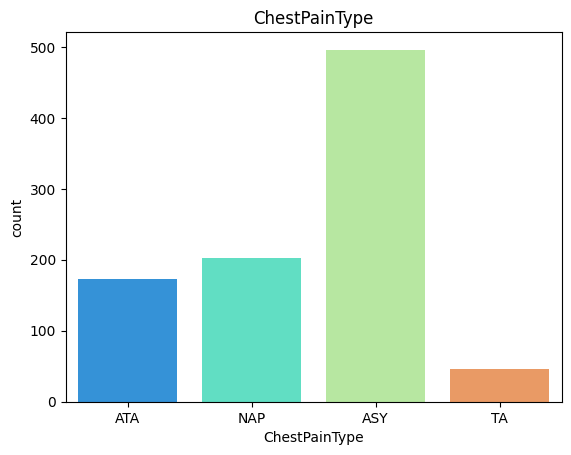

In [78]:
# countplot to display ChestPainType distribution
sns.countplot(x=df['ChestPainType'], palette="rainbow")
plt.title('ChestPainType')

Die häufigste Ausprägung bei den Brustschmerzen sind die asymptomatischen Brustschmerzen. Die wenigsten Fälle beschreiben typical angina chest pain.


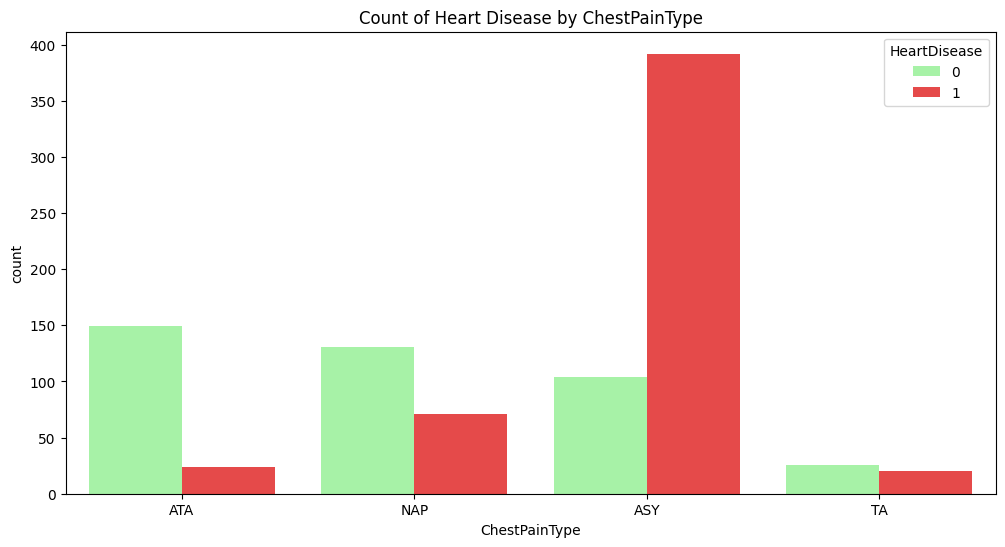

In [79]:
# create a countplot showing the distribution of heart disease by ChestPainType
plt.figure(figsize=(12, 6))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, palette=colors_red_green)
plt.title('Count of Heart Disease by ChestPainType')

plt.show()


Interessanterweise zeigen Patienten mit asystomatischen Brustschmerzen am häufigsten eine Herzkrankheit auf. Bei der Gruppe TA gibt es in etwas gleich viele Gesunde wie Erkrankte. In den anderen beiden Gruppen überwiegt die Anzahl der gesunden Patienten.

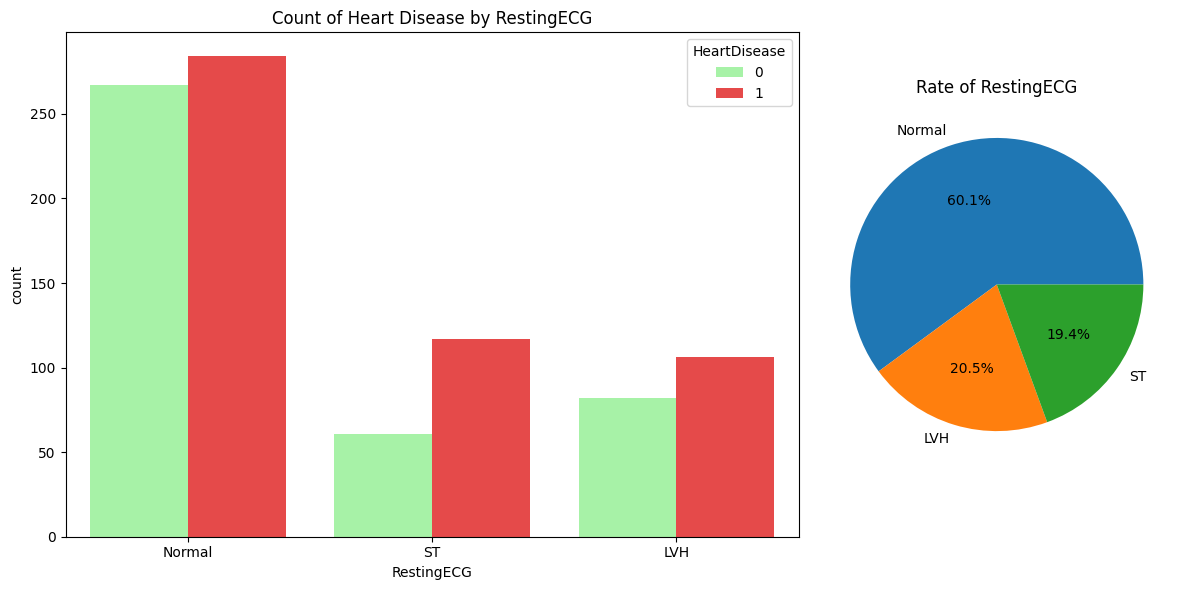

In [80]:
# create a figure with a grid of 1 row and 2 columns, with the second column being narrower
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

# subplot 1: Countplot showing the distribution of heart disease by RestingECG
ax1 = fig.add_subplot(gs[0])
sns.countplot(x='RestingECG', hue='HeartDisease', data=df, palette=colors_red_green, ax=ax1)
ax1.set_title('Count of Heart Disease by RestingECG')

# subplot 2: Pie chart illustrating the distribution of RestingECG values in the dataframe
ax2 = fig.add_subplot(gs[1])
types = df['RestingECG'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('Rate of RestingECG')

plt.tight_layout()
plt.show()


Die Ruheelektrokardiogrammergebnisse zeigen überwiegend normale Werte (60%). Die Gruppen LVH und ST (Beschreibung siehe oben) sind mit jeweils annähernd 20% seltener vertreten. Pro Gruppe gibt es allerdings stets mehr erkrankte als gesunde Patienten.

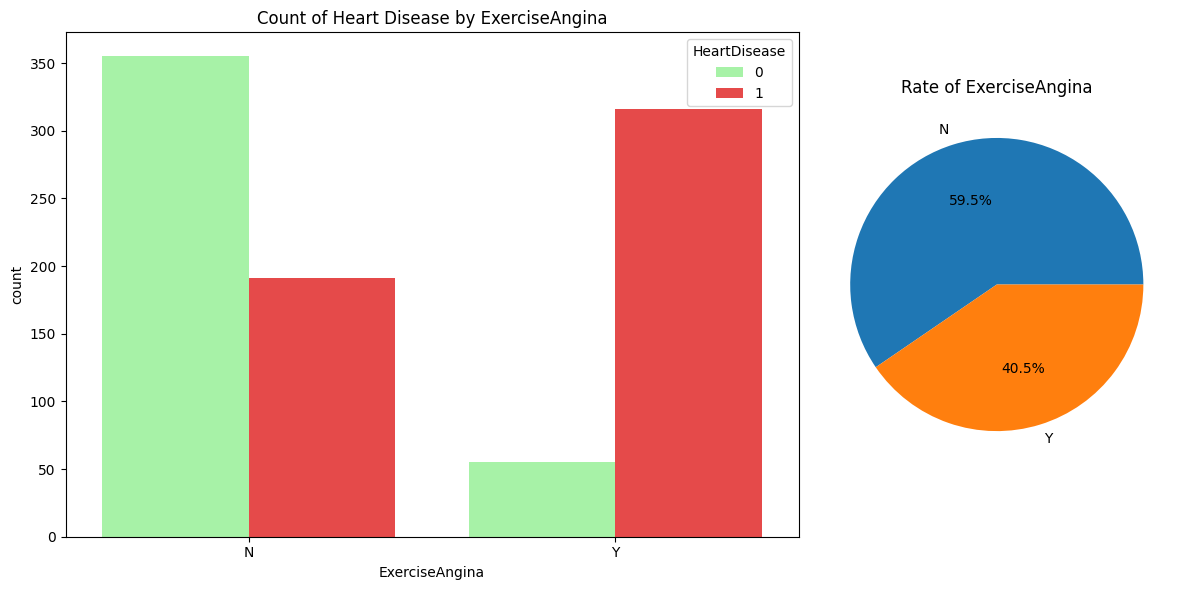

In [81]:
# create a figure with a grid of 1 row and 2 columns, with the second column being narrower
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

# subplot 1: Countplot showing the distribution of heart disease by ExerciseAngina
ax1 = fig.add_subplot(gs[0])
sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=df, palette=colors_red_green, ax=ax1)
ax1.set_title('Count of Heart Disease by ExerciseAngina')

# subplot 2: Pie chart illustrating the distribution of ExerciseAngina in the dataframe
ax2 = fig.add_subplot(gs[1])
types = df['ExerciseAngina'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('Rate of ExerciseAngina')

plt.tight_layout()
plt.show()


Die Mehrheit im Datensatz besitzt keine Belastungsinduzierte Brustschmerzen. Diejenigen Patienten die derartige Brustschmerzen aufweisen, haben jedoch signigfikant öfter eine Herzerkranung als die andere Gruppe.

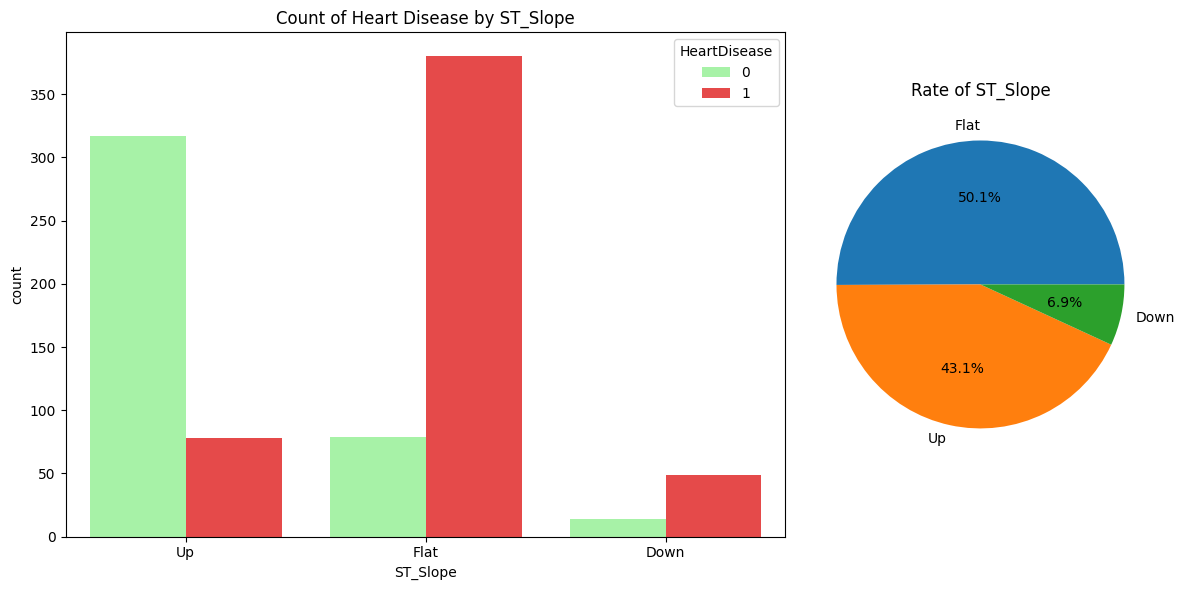

In [82]:
# create a figure with a grid of 1 row and 2 columns, with the second column being narrower
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

# subplot 1: Countplot showing the distribution of heart disease by ST_Slope
ax1 = fig.add_subplot(gs[0])
sns.countplot(x='ST_Slope', hue='HeartDisease', data=df, palette=colors_red_green, ax=ax1)
ax1.set_title('Count of Heart Disease by ST_Slope')

# subplot 2: Pie chart illustrating the distribution of ST_Slope in the dataframe
ax2 = fig.add_subplot(gs[1])
types = df['ST_Slope'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('Rate of ST_Slope')

plt.tight_layout()
plt.show()


ST_Slope beschreibt die Steigung des peak exercise ST Segments. Wie man der Visualisierung entnehmen kann gibt es überwiegend flache und und steigende ST Segmente. Bis auf den steigenden Segmenten gibt es in jeder Gruppe deutlich mehr Herzerkrankte zu geben. Wie es scheint, sind Patienten mit einer steigenden Kurve wahrscheinlicher gesund.

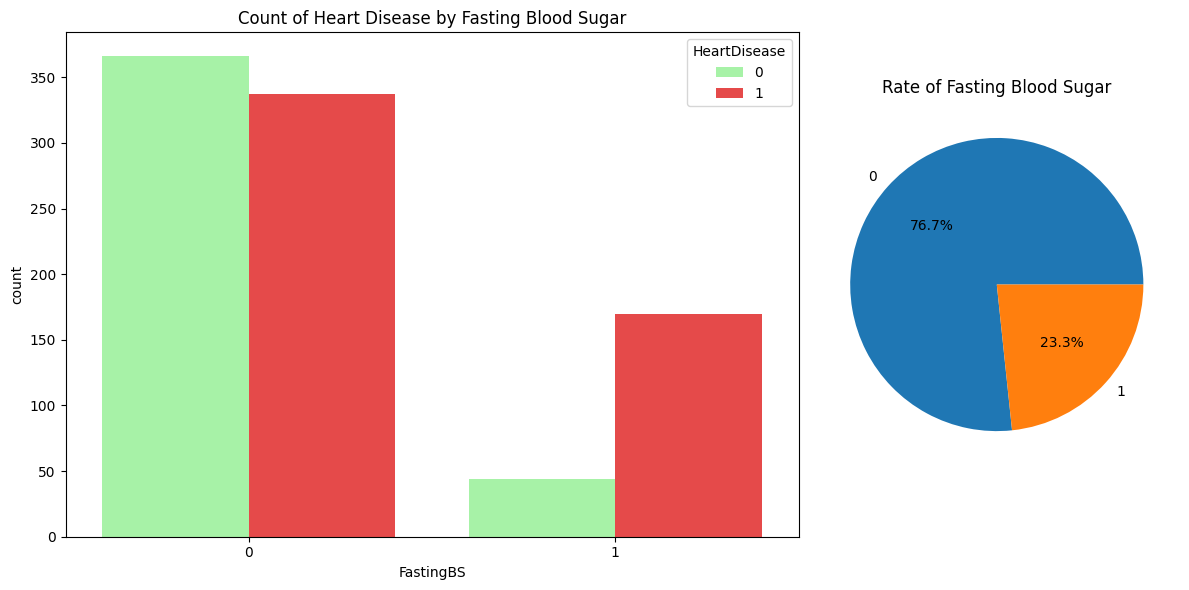

In [83]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

# countplot for heart disease by fasting blood sugar
ax1 = fig.add_subplot(gs[0])
sns.countplot(x='FastingBS', hue='HeartDisease', data=df, palette=colors_red_green, ax=ax1)
ax1.set_title('Count of Heart Disease by Fasting Blood Sugar')

# pie chart for the distribution of fasting blood sugar
ax2 = fig.add_subplot(gs[1])
types = df['FastingBS'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('Rate of Fasting Blood Sugar')

plt.tight_layout()
plt.show()


Das Attribut FastingBS beschreibt den nüchternen Blutzuckerspiegel eines Patienten, während Werte von 1 einen Blutzuckerspiegel von > 120 mg/dl kennzeichnen. Werte darunter sind mit 0 beschrieben. Der Großteil der Patienten fällt unter die Gruppe 0. In dieser Gruppe gibt es annähernd gleich viele Patienten mit sowie ohne Krankheit. In der Gruppe mit dem höheren Blutzuckerspiegel haben weitaus mehr Patienten eine Herzkrankheit.

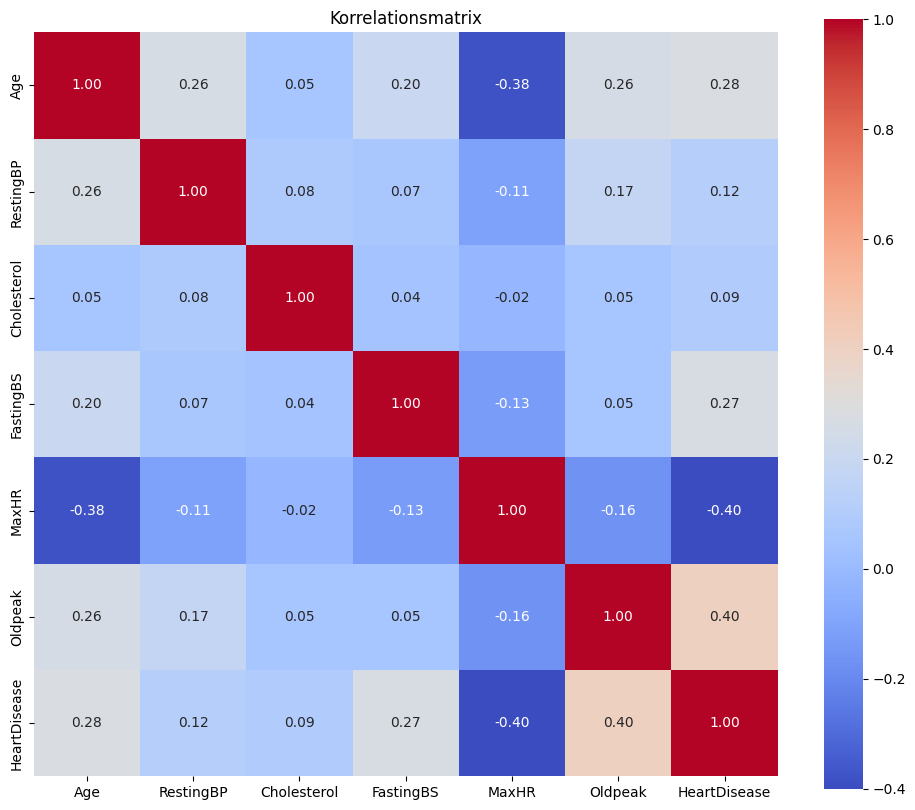

In [84]:
# create corelation matrix

correlations = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Korrelationsmatrix')
plt.show()

Um die Korrelationen zwischen den einzelnen Attributen zu ermittlen, wird diese Korrelationsmatrix erstellt. Die stärkste Korrelation weisen die Attribute Oldpeak und Heartdisease auf. Das lässt darauf schließen, dass sich je nach Gruppe innerhalb des Attributs Oldpeak eine genauere Aussage über den Gesundheitszustands eines Patienten fallen lässt. Weitere, jedoch schwächere Korrelationen (>= 0.20) herrschen zwischen den Attributen Age und Heartdisease, Age und Oldpeak, RestingPB und Age, FastingBS und Age, MaxHR und Cholesterol. Auffällig ist die negative Korrelation zwsichen MaxHR und Heartdisease. Der Wert -0,40 besagt, dass ein Patient mit Herzerkrankung einen tendenziell niedrigeren Maximalen Puls hat. Dies erschien auf den ersten Blick merkwürdig, da die Annahme herrschte, Herzerkrankte menschen hätten einen höheren Puls.  

/var/folders/3l/_xvv3581559_krvl1r82px5w0000gn/T/ipykernel_3402/995114334.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='MaxHR', data=df, palette=colors_red_green)


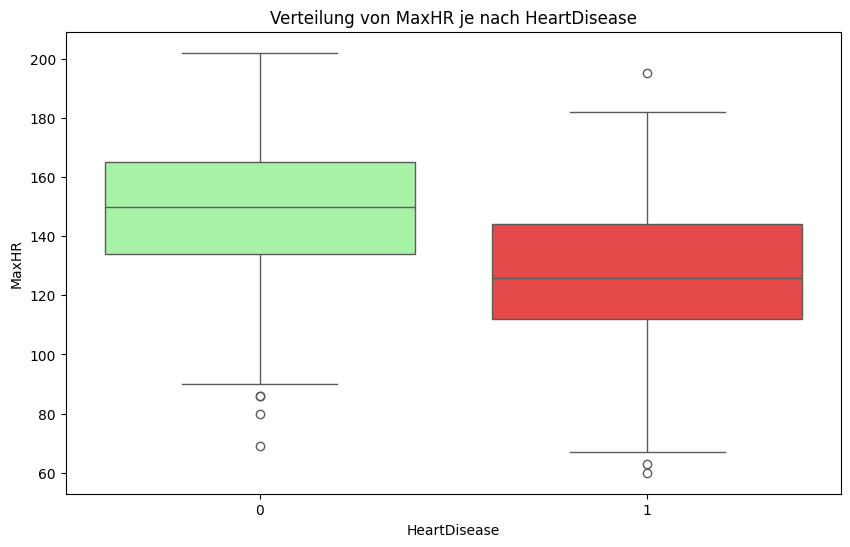

In [85]:
# create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='MaxHR', data=df, palette=colors_red_green)
plt.title('Verteilung von MaxHR je nach HeartDisease')
plt.xlabel('HeartDisease')
plt.ylabel('MaxHR')
plt.show()


Doch dieser Boxplot bestätigt den Wert in der Korrelationsmatrix.

## Outlier Detection

In den nächsten werden die Outlier im Datensatz analysiert.

In [86]:
# choose only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# funtion to define outliers
def detect_outliers(data):
    """
    Detect outliers in the given DataFrame.

    Parameters:
    - data (DataFrame): The DataFrame containing the data.

    Returns:
    - outliers (list): A list of indices corresponding to the outliers in the DataFrame.
    """
    outliers = []
    for col in data.columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outlier_indices = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
        outliers.extend(outlier_indices)
    return outliers


# find outliers
outliers_indices = detect_outliers(df[numeric_cols])

# remove duplicated indices
outliers_indices = list(set(outliers_indices))

print("Indices of outliers:", outliers_indices)

print("Outlier rows:")
print(df.iloc[outliers_indices])


Indices of outliers: [515, 516, 518, 521, 522, 531, 532, 536, 537, 538, 28, 541, 30, 544, 546, 547, 36, 549, 550, 38, 553, 554, 556, 557, 559, 563, 52, 564, 58, 571, 826, 573, 574, 575, 577, 579, 580, 69, 582, 68, 584, 585, 76, 589, 78, 592, 593, 594, 595, 84, 86, 599, 604, 605, 606, 607, 97, 98, 610, 612, 613, 102, 103, 616, 105, 108, 109, 621, 624, 112, 117, 120, 632, 123, 639, 128, 132, 644, 650, 658, 659, 660, 149, 666, 667, 155, 160, 673, 672, 675, 165, 166, 679, 682, 686, 182, 185, 187, 189, 190, 702, 701, 718, 208, 210, 725, 728, 732, 734, 224, 738, 227, 744, 238, 752, 241, 242, 759, 247, 250, 256, 771, 774, 263, 775, 780, 782, 784, 785, 274, 275, 278, 790, 791, 793, 795, 284, 796, 799, 802, 803, 294, 295, 296, 297, 298, 299, 300, 809, 302, 303, 304, 305, 306, 308, 309, 820, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 838, 327, 328, 329, 330, 331, 842, 333, 334, 335, 843, 337, 338, 339, 340, 341, 342, 855, 343, 344, 850, 347, 349, 350, 869, 871, 87

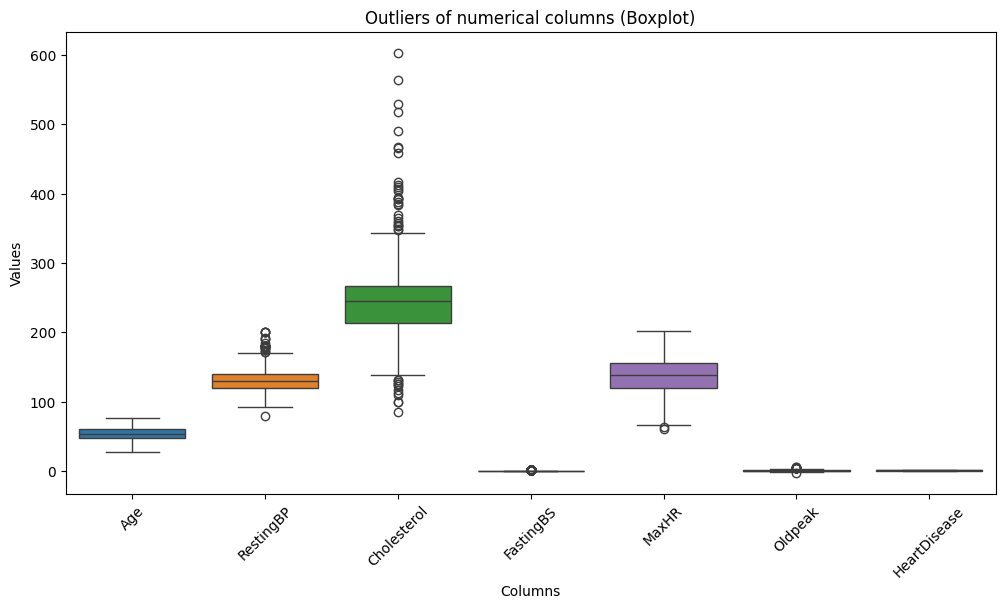

In [87]:
# box plot to display outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45) 
plt.title('Outliers of numerical columns (Boxplot)')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

Die Outlier Detection liefert bis gute Ergebnisse. Dadurch, dass die Anomalien bei der Analyse der Datenqulität behoben worden, gibt es keine weiteren erheblichen Einschränkungen in den Daten. Während Serum Cholesterol Werte von > 600 äußert gefährlich erscheinen, sind diese in der Realität dennoch möglich.

# Machine Learning 

Der vorliegende Datensatz liefert ein binäres Klassifikationsproblem. Um einen ersten Ansatz für die Auswahl eines endgültigen Classifiers zu ermitteln, wurden im Folgenden 3 verschiedene Classifier getestet.

Diese wären:
- Randomforest
- Logistic Regression
- Support Vector Machine


Die Auswahl dieser drei Classifie beruht auf ihrer Effektivität bei binären Klassifikationsproblemen. Jeder Algorithmus bietet spezifische Vorzüge und kann unterschiedliche Aspekte des Problems abdecken.

## Metriken
Für die Bewertung des Models werden insbesondere die folgenden Metriken verwendet: 
- Recall
- F1-Score
- ROC-AUC-Score

Der F1-Score ist ein harmonisches Mittelmaß zwischen Präzision und Recall und ermöglicht eine ausgewogene Bewertung von False Positives und False Negatives.

Der Recall bewertet die Fähigkeit des Modells, positive Instanzen korrekt zu identifizieren, was besonders wichtig ist, um sicherzustellen, dass keine relevanten Fälle übersehen werden.

Der ROC-AUC-Score bewertet die Fähigkeit des Modells, zwischen den Klassen zu unterscheiden, indem er die Fläche unter der ROC-Kurve misst, wobei ein höherer Wert auf eine bessere Leistung hinweist. 

Diese Metriken in Kombination bieten eine umfassende Bewertung des Modells für das binäre Klassifikationsproblem.

## Feature Engineering

Da die Kategorischen Attribute nicht vom Classifier erkannt werden, wird hier ein One-Hot-Encoding angewandt. One-Hot-Encoding ist eine Methode zur Umwandlung von kategorischen Variablen in ein binäres Format, das von maschinellen Lernalgorithmen besser verstanden werden kann.

In [88]:
# featrue engineering
df_encoded = pd.get_dummies(df, columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"])

Im nächsten Schritt werden die target und feature Variablen festgelegt.

In [89]:
# preparation for train/test split
target = df_encoded["HeartDisease"]
features = df_encoded.drop("HeartDisease", axis=1)

### Train-/Testsplit

Um einen Bias im Machine Learning Model zu vermeiden, splittet man den Datensatz auf in Trainings- und Testdaten. Der Trainingsdatensatz wird verwendet, um das tatsächliche Modell zu erstellen, das der Algorithmus verwenden wird, wenn er neuen Daten ausgesetzt ist. 

Das Testset ist der letzte Datensatz, der verwendet wird. Die Genauigkeit bei der Vorhersage des Testsets entspricht der Genauigkeit des ML-Algorithmus.

Für den train/test Split wird ein Verhältnis von 80/20 gewählt. 

In [123]:
# train/test split (80%/20%)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

## Classifier

Die folgende Methoden werden verwendet, um die drei gewählten Classifier zur fitten, die Scores anzuzeigen und jeweils die Confusion Matrix auszuegebn.

In [124]:
def model(classifier):
    """
    Train the classifier on the training data and evaluate its performance on the test data.

    Parameters:
    - classifier: The classifier model to be trained and evaluated.

    Returns:
    None
    """
    classifier.fit(features_train, target_train)
    prediction = classifier.predict(features_test)
    print("Accuracy: {:.2%}".format(accuracy_score(target_test, prediction)))
    print("ROC_AUC Score: {:.2%}".format(roc_auc_score(target_test, prediction)))


def model_evaluation(classifier):
    """
    Evaluate the classifier using various performance metrics and visualize the results.

    Parameters:
    - classifier: The trained classifier model.

    Returns:
    None
    """
    # disply confusion Matrix
    cm = confusion_matrix(target_test, classifier.predict(features_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap=colors, fmt='')
    
    # show classification Report
    print(classification_report(target_test, classifier.predict(features_test)))


# ML: Random Forrest

Der Random Forest Classifier ist ein Algorithmus für die Klassifizierung, der auf der Kombination mehrerer Entscheidungsbäume basiert. Er eignet sich gut für die Vorhersage von Herzkrankheiten aufgrund seiner Fähigkeit, mit verschiedenen Datentypen umzugehen und robuste Ergebnisse zu liefern. Er heißt "Random" Forest, da beim Algorithmus zwei zufällige Prozesse ablaufen. Zum einen das Bootstrapping zum anderen die Feature Auswahl beim erstellen der Entscheidungsbäume. Der Algorithmus baut also eine Vielzahl an Bäumen, die auf zufälligen Daten des Datensatzes basieren. 

In [125]:
# defining RFC 
forest = RandomForestClassifier()

# get scores
model(forest)

Accuracy: 88.04%
ROC_AUC Score: 87.90%


              precision    recall  f1-score   support

           0       0.87      0.87      0.87        82
           1       0.89      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



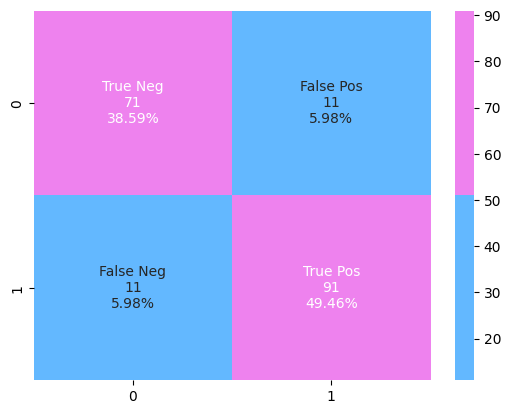

In [126]:
# get evalutation
model_evaluation(forest)

# ML: Logistic Regression

Die logistische Regression ist ein Algorithmus zur Klassifizierung, der die Wahrscheinlichkeit für das Eintreten eines Ereignisses basierend auf einer oder mehreren unabhängigen Variablen schätzt. Dabei nutzt sie die logistische Funktion, um die Vorhersage zwischen 0 und 1 zu skalieren. Sie eignet sich gut für binäre Klassifizierungsaufgaben wie die Vorhersage von Herzkrankheiten. 

In [127]:
# defining LRC
classifier_lr = LogisticRegression(max_iter=10000)

# get scores
model(classifier_lr)

Accuracy: 88.04%
ROC_AUC Score: 87.78%


              precision    recall  f1-score   support

           0       0.88      0.85      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



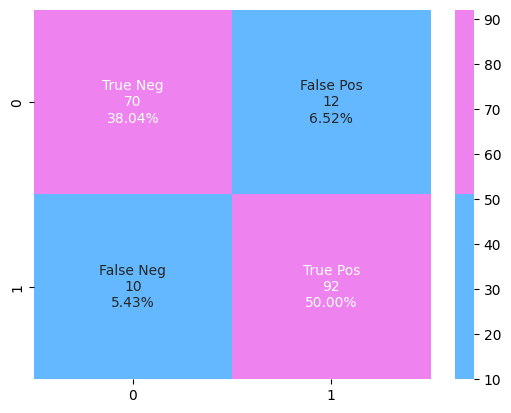

In [128]:
# get scores
model_evaluation(classifier_lr)

# ML: Support Vector Machine

Die Support Vector Machine ist ebenfalls ein Klassifizierungsalgorithmus, der darauf abzielt, eine Trennung zwischen den verschiedenen Klassen zu finden, indem er die beste Entscheidungsgrenze (Hyperplane) zwischen den Datenpunkten sucht. Sie funktioniert, indem sie den Abstand zwischen den Datenpunkten maximiert und gleichzeitig eine minimale Fehlerrate aufweist. SVM eignet sich gut für datengetriebene Anwendungen mit komplexen Entscheidungsgrenzen und kann auch mit nicht-linearen Daten umgehen, indem sie den sogenannten Kernel-Trick anwendet. In Bezug auf Herzkrankheiten eignet sich die SVM, wenn die Daten gut separierbar sind und klare Entscheidungsgrenzen zwischen den Klassen existieren.

In [129]:
# defining SVM 
svc = SVC(kernel = 'linear', C = 0.1)

# get scores
model(svc)

Accuracy: 86.96%
ROC_AUC Score: 86.80%


              precision    recall  f1-score   support

           0       0.85      0.85      0.85        82
           1       0.88      0.88      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



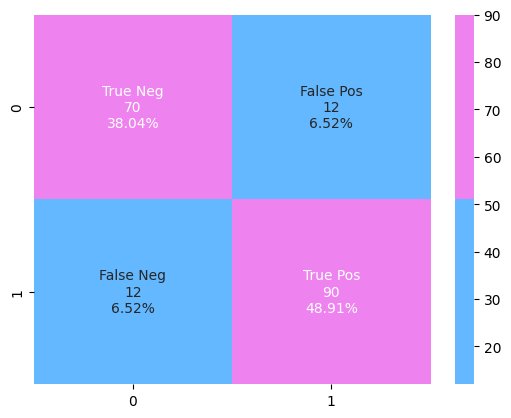

In [130]:
# get evaluation
model_evaluation(svc)

### Feature Importance für den RFC

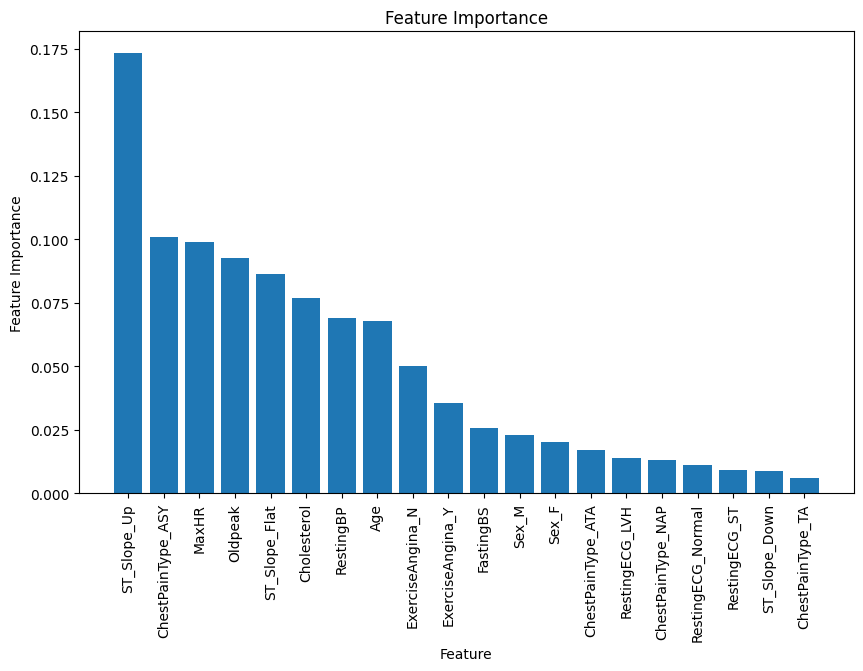

In [131]:
# plot for feature importances
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = features_train.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(features_train.shape[1]), importances[indices], align="center")
plt.xticks(range(features_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()


# Gridsearch Prameter Tuning

Das Parameter-Tuning wird nur für den Random Forest Classifier (RFC) durchgeführt. Der RFC ist bekannt für seine Vielseitigkeit und Robustheit, insbesondere bei binären Klassifikationsproblemen wie im vorliegenden Fall. Durch das Feintuning seiner Hyperparameter kann die Vorhersagegenauigkeit weiter optimiert und potenzielles Overfitting reduziert werden. Dies ermöglicht eine präzisere Identifizierung von Herzkrankheiten, was in medizinischen Anwendungen von entscheidender Bedeutung ist.

Das Parameter-Tuning wird mithilfe von Grid Search durchgeführt, einem Ansatz zur systematischen Suche nach den besten Hyperparameter-Kombinationen für ein Machine Learning-Modell. Grid Search durchläuft vordefinierte Kombinationen von Hyperparametern und bewertet die Leistung des Modells anhand einer bestimmten Metrik für jede Kombination. In unserem Fall optimieren wir den Receiver Operating Characteristic Area Under Curve (ROC AUC) Score. Der ROC AUC Score ist eine Metrik, die die Fähigkeit eines Modells bewertet, zwischen den Klassen zu unterscheiden und die Trade-offs zwischen True Positive Rate und False Positive Rate darstellt. Für das binäre Klassifikationsproblem mit Herzkrankheiten ist es wichtig, dass unser Modell eine hohe Unterscheidungskraft zwischen kranken und gesunden Patienten aufweist, weshalb wir den ROC AUC Score optimieren. 

In [132]:
# defining the grid search parameters
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}

In [133]:
# defining the hyperparameter space to identify the optimal combination of hyperparemeters for the RFC
grid_search = GridSearchCV(estimator=forest,
                           param_grid=param_grid,
                           scoring= "roc_auc",
                           refit="roc_auc",
                           cv=5,
                           n_jobs=-1,
                           verbose=4)

In [134]:
# searching for the best combination
grid_search.fit(features_train, target_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.913 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.914 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.942 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.970 total time=   0.2s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.872 total time=   0.2s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.943 total time=   0.3s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.919 total time=   0.3s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             refit='roc_auc', scoring='roc_auc', verbose=4)

In [135]:
# get best combination and result
print("Beste Hyperparameter-Kombinationen: ", grid_search.best_params_)
print("Beste Performance: ", grid_search.best_score_)

Beste Hyperparameter-Kombinationen:  {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Beste Performance:  0.9283950617283951


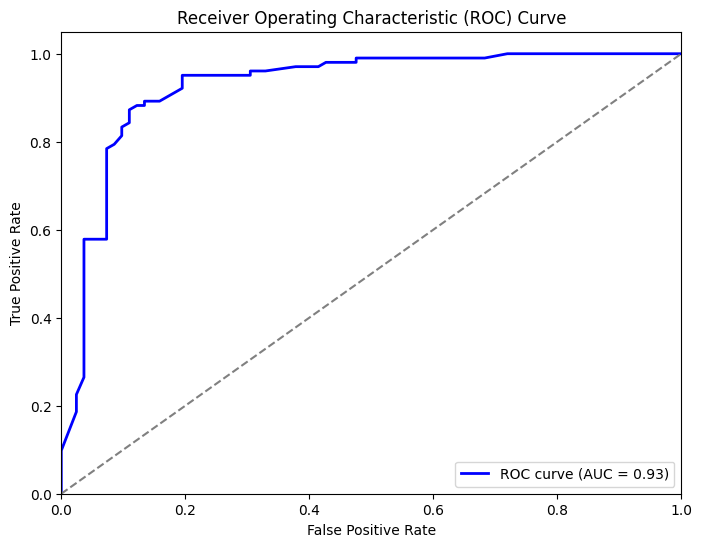

In [136]:
target_pred_proba = forest.predict_proba(features_test)[:, 1]

# compute ROC curve and ROC-AUC score
fpr, tpr, thresholds = roc_curve(target_test, target_pred_proba)
roc_auc = roc_auc_score(target_test, target_pred_proba)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Evaluation und Ergebnisdarstellung

Basierend auf der Evaluation der drei Klassifikationsmodelle – Random Forest Classifier, Logistische Regression und Support Vector Machine – erzielte der RFC vor dem Parameter-Tuning die beste Leistung mit einer Genauigkeit von 88.59% und einem ROC AUC Score von 88.27% (Diese Werte können bei erneutem ausführen des Notebooks abweichen, da der Train-Test split einen randomstate von 42 besitzt). Der precision, recall und f1-score für beide Klassen (Herzkrankheit und Normal) zeigen eine ausgeglichene Leistung des Modells. Nach dem Parameter-Tuning wurden die Hyperparameter des RFC optimiert, wodurch eine verbesserte Leistung mit einer ROC AUC Score von 92.78% erzielt wurde. Dies unterstreicht die Wirksamkeit des gewählten Ansatzes und die Fähigkeit des Modells, zwischen Herzkrankheit und Normalzustand zu unterscheiden.

# Vorhersage-Demo

In [137]:
selected_data_point = features_train.iloc[0:1, :]
selected_target = target_train.iloc[0]

# make the prediction for the chosen data point
prediction = forest.predict(selected_data_point)

# disply the chosen data point, the true class and the predicted class
print("Ausgewählter Datenpunkt:")
print(selected_data_point)
print("\nWahre Klasse des ausgewählten Datenpunkts:", selected_target)
print("\nVorhersage für den ausgewählten Datenpunkt:", prediction)

Ausgewählter Datenpunkt:
     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_F  Sex_M  \
161   49        128          212          0     96      0.0  False   True   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
161               True              False              False   

     ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
161             False           False               True          False   

     ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  \
161             False              True          False           True   

     ST_Slope_Up  
161        False  

Wahre Klasse des ausgewählten Datenpunkts: 1

Vorhersage für den ausgewählten Datenpunkt: [1]


Wie man anhand des Beispiels sieht, erkennt das Model den gegeben Datenpunkt korrekt als Herzerkrankung an.  